### Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

### Parámetros

In [2]:
# Parámetros de LoRa
SF = 7                     # Spreading Factor (puede ser 7 a 12)
BW = 125e3                 # Bandwidth en Hz (125 kHz típico)
Fs = BW                   # Frecuencia de muestreo (usamos 1 muestra por Hz)
N = 2**SF                  # Número de chips por símbolo

# Tiempo y muestras
Ts = 1 / BW               # Duración de cada chip
T_symbol = N * Ts         # Duración de un símbolo
t = np.linspace(0, T_symbol, N, endpoint=False)  # vector de tiempo


### Generador de hipotesis 

In [3]:
#k indica la cantidad de vectores a generar
def generate_lora_bits(k):
    bits_totales = k * SF            # Número de símbolos a generar
    info_bits = np.zeros((bits_totales, SF),dtype=int)  # Matriz para almacenar los bits de información

    for i in range(bits_totales):
        for j in range(SF):
            info_bits[i, j] = np.random.randint(0, 2)
    
    return info_bits

### Encoder

In [4]:
def encode_lora_symbol(k):
    bits = generate_lora_bits(k)  # Generar k símbolos de LoRa
    simbolos = np.zeros((k, 1),dtype=int)  # Matriz para almacenar los símbolos
    for i in range(k):
        print("Bits:", bits[i])
        for j in range(SF):
            simbolos[i] += bits[i, SF - j - 1] * (2 ** j)  # recorremos de derecha a izquierda
            
        print("Valor decimal:", simbolos[i,0])
    return simbolos

### Decoder


In [5]:
def decoder(simbolos):
    bits = np.zeros((len(simbolos), SF), dtype=int)

    for i, simbolo in enumerate(simbolos):
        valor = simbolo[0] if isinstance(simbolo, np.ndarray) else simbolo
        bin_str = format(valor, f'0{SF}b')  # convierte a binario, con ceros a la izquierda
        bits[i] = [int(b) for b in bin_str]   # guarda como vector de bits
        print("Simbolo:", simbolo, "Bits decodificados:", bits[i])
        

    return bits

### Cálculo del ber

In [6]:
def calcular_ber(bits_enviados, bits_recibidos):
    errores = 0    
    for i in range(len(bits_enviados)):
        errores = errores + np.array_equal(bits_enviados[i], bits_recibidos[i])

    total_bits = bits_enviados.size
    ber = errores / total_bits

    return errores, total_bits, ber


### Waveform former

In [7]:
def waveform_lora(symbol):
    N = 2**SF
    k = np.arange(N)
    fase = 2 * np.pi * ((symbol + k) ** 2) / (2 * N)
    wave = np.exp(1j * fase)
    return wave

### n-tupler Correlador

In [ ]:
def correlador(signal, T):
  t=np.arange(0, 2+T, T)
  waveform = np.zeros(len(t))
  for i in range(len(t)):
    if t[i] <= 1:
      waveform[i] = t[i]
    else:
      waveform[i] = 2 - t[i]
  min_len = len(signal) if len(signal)<len(waveform) else len(waveform)
  corr = 0
  for i in range(min_len):
    corr += signal[i] * waveform[i]
  return corr*T

### Ploteo

In [8]:
# === Ploteo ===

def ploteo(signal, symbol):

    plt.figure(figsize=(10, 5))

    # Señal en el tiempo
    plt.subplot(2, 1, 1)
    plt.plot(t * 1e3, np.real(signal), label='Parte Real')
    plt.title(f"Forma de onda LoRa (SF={SF}, símbolo={symbol})")
    plt.xlabel("Tiempo [ms]")
    plt.ylabel("Amplitud")



    # Calcular frecuencia instantánea
    # Derivada de la fase en el tiempo
    inst_phase = np.unwrap(np.angle(signal))
    inst_freq = np.diff(inst_phase) * Fs / (2 * np.pi)  # Hz
    t_mid = (t[:-1] + t[1:]) / 2  # Para alinear el tiempo con derivada

    # Ploteo
    plt.subplot(2, 1, 2)
    plt.plot(t_mid * 1e3, inst_freq / 1e3)
    plt.title(f"Frecuencia Instantánea del Chirp LoRa (símbolo={symbol}, SF={SF})")
    plt.xlabel("Tiempo [ms]")
    plt.ylabel("Frecuencia [kHz]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.tight_layout()
    plt.show()

## Simulación

Bits: [1 1 1 1 0 0 0]
Valor decimal: 120
Bits: [1 0 1 1 1 0 0]
Valor decimal: 92
Bits: [0 1 1 0 0 1 0]
Valor decimal: 50
Bits: [0 0 1 0 0 1 1]
Valor decimal: 19
Bits: [0 1 1 0 0 1 1]
Valor decimal: 51
Bits: [1 0 1 1 1 1 0]
Valor decimal: 94
Bits: [1 1 1 0 1 1 1]
Valor decimal: 119
Bits: [0 1 1 1 1 0 1]
Valor decimal: 61
Bits: [1 1 1 0 0 1 1]
Valor decimal: 115
Bits: [1 0 1 1 1 1 0]
Valor decimal: 94
Bits: [1 0 0 0 0 0 1]
Valor decimal: 65
Bits: [1 0 1 0 1 0 0]
Valor decimal: 84
Bits: [0 1 1 0 1 1 0]
Valor decimal: 54
Bits: [1 1 0 0 0 0 1]
Valor decimal: 97
Bits: [1 1 0 0 0 1 1]
Valor decimal: 99
Bits: [0 0 0 0 1 1 0]
Valor decimal: 6
Bits: [0 0 1 1 0 0 0]
Valor decimal: 24
Bits: [0 1 1 1 0 0 1]
Valor decimal: 57
Bits: [0 1 0 0 0 0 0]
Valor decimal: 32
Bits: [0 0 0 1 0 0 1]
Valor decimal: 9
Bits: [1 1 1 1 0 1 1]
Valor decimal: 123
Bits: [0 1 0 0 1 0 1]
Valor decimal: 37
Bits: [0 0 0 1 1 1 0]
Valor decimal: 14
Bits: [1 1 1 0 1 0 1]
Valor decimal: 117
Bits: [1 1 0 1 0 1 0]
Valor decimal: 

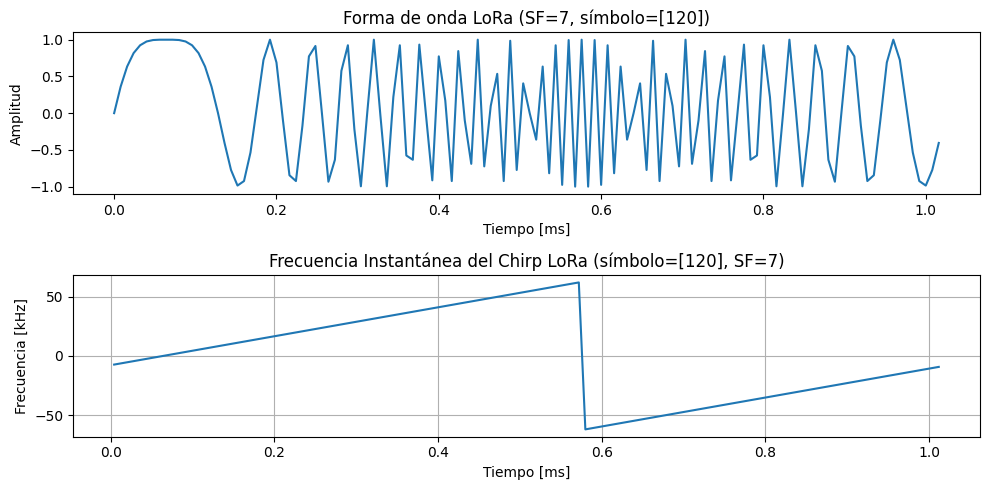

<Figure size 640x480 with 0 Axes>

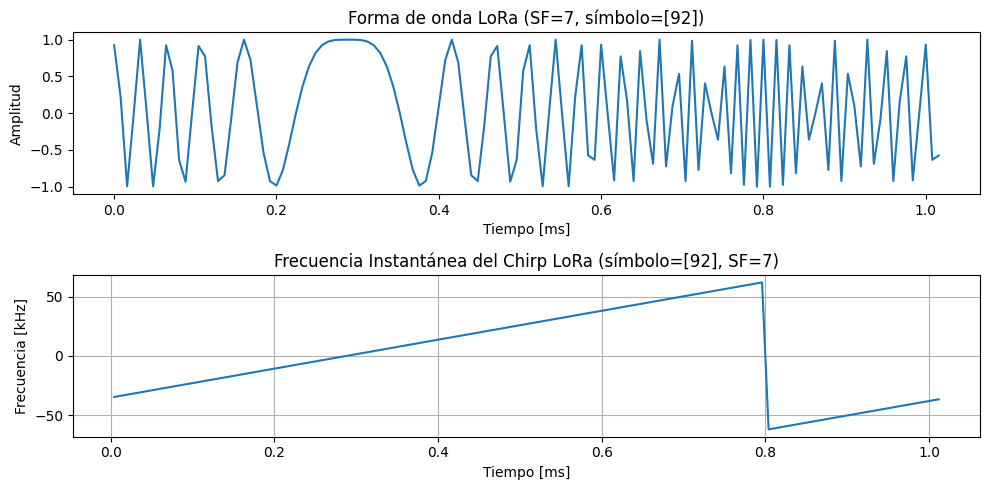

<Figure size 640x480 with 0 Axes>

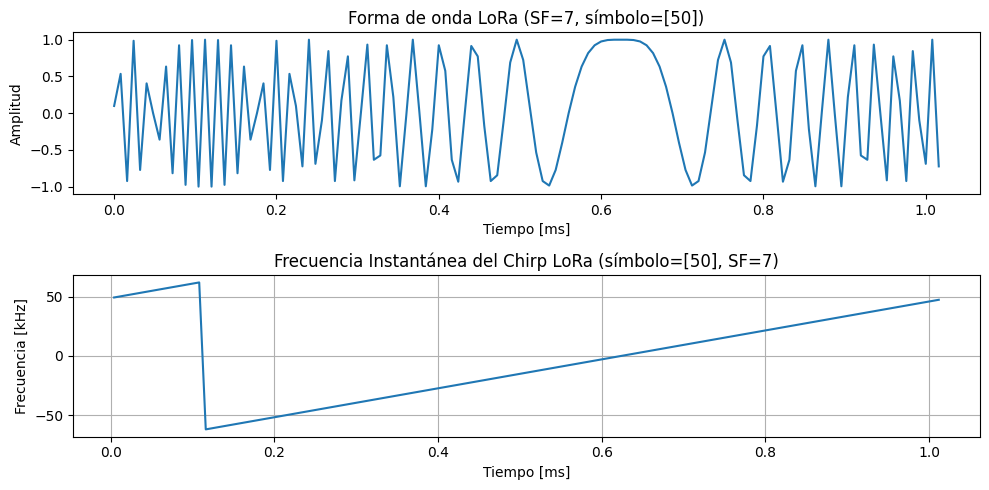

<Figure size 640x480 with 0 Axes>

In [9]:
info_enviada = encode_lora_symbol(5000)
info_recibida = decoder(info_enviada)
# Calcular BER
errores, total_bits, ber = calcular_ber(info_enviada, info_recibida)
print(f"Errores: {errores}, Total de cadena de bits: {total_bits}, BER: {ber:.4f}")

wave1 = waveform_lora(info_enviada[0])
wave2 = waveform_lora(info_enviada[1])
wave3 = waveform_lora(info_enviada[2])

ploteo(wave1, info_enviada[0])
ploteo(wave2, info_enviada[1])
ploteo(wave3, info_enviada[2])




